In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-for-diabetes-with-python/diabetes_data.csv


In [2]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#loading and visualizing the Dataset
dataset = pd.read_csv('../input/machine-learning-for-diabetes-with-python/diabetes_data.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#description of dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#selection and splitting of data
data = dataset.iloc[:,0:8]
outcome = dataset.iloc[:,8]
x,y = data,outcome

In [6]:
#distribution of dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [7]:
#counting positive and negative values
print(y_test.value_counts())
#mean of testng distn
print(1- y_test.mean())

0    130
1     62
Name: Outcome, dtype: int64
0.6770833333333333


In [8]:
#Parameter evaluation with gsc validation
#Using Grid Search Cross Validation for evaluating the best parameters
gbe = GradientBoostingClassifier(random_state=0)
parameters={
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features' : [0.5, 1],
    'max_depth' : [3, 4, 5]
}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.5}
0.8406666666666667


In [9]:
#adjusting development threshlod
gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
gbi.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.5, random_state=0)

In [10]:
#storing the prediction
yprediction = gbi.predict_proba(x_test)[:,1]

Text(0, 0.5, 'Frequency')

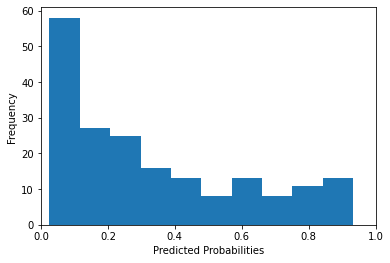

In [11]:
#plotting the predictions
plt.hist(yprediction,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")

In [12]:
#Score of Gradient Boosting Classifier
round(roc_auc_score(y_test,yprediction),5)

0.85248

In [13]:
#using random forest classification (scr of rfc)
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train, y_train)
y_pred = rmfr.predict(x_test)
accuracyrf = round(accuracy_score(y_pred, y_test), 5)
accuracyrf

0.78646

In [14]:
#Score of XGBoost Classifier 
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = round(accuracy_score(y_test, predictions),5)
accuracy

0.76042